In [5]:
# pip install bioinfokit

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
train_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [8]:
train_df.dtypes


ID                   int64
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
y                   object
dtype: object

In [9]:
train_df.duplicated().sum()

0

In [10]:
train_df.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='Perimeter'>

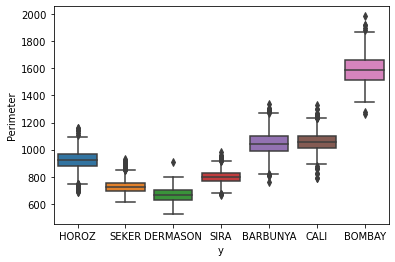

In [11]:
import seaborn as sns
sns.boxplot(x="y", y="Perimeter", data=train_df)

<AxesSubplot:xlabel='y', ylabel='ConvexArea'>

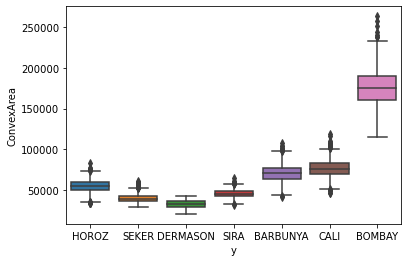

In [12]:
sns.boxplot(x="y", y="ConvexArea", data=train_df)

In [13]:
selected_features = list(train_df.columns)[1:7]
train_df[selected_features]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity
0,58238,971.303,397.202654,186.945510,2.124697,0.882317
1,44515,757.601,265.590470,213.967453,1.241266,0.592420
2,31662,653.783,239.902428,168.421505,1.424417,0.712136
3,38778,734.020,268.446281,184.061923,1.458456,0.727925
4,42530,775.403,281.212824,193.236878,1.455275,0.726511
...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699
10832,48212,826.362,309.639462,199.285811,1.553746,0.765357


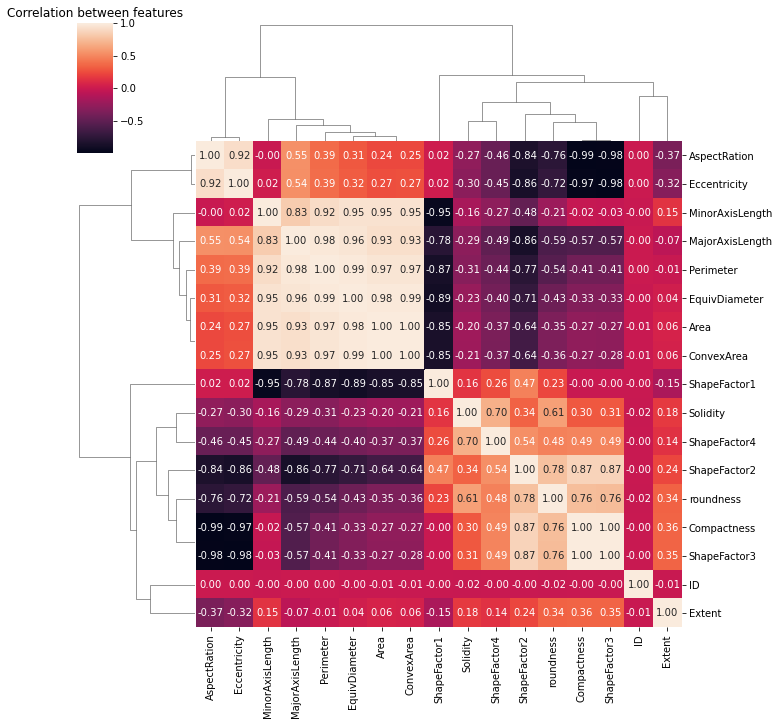

In [14]:
import matplotlib.pyplot as plt

# Visualizing the correlation between the features
corr_matrix = train_df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between features");plt.show()

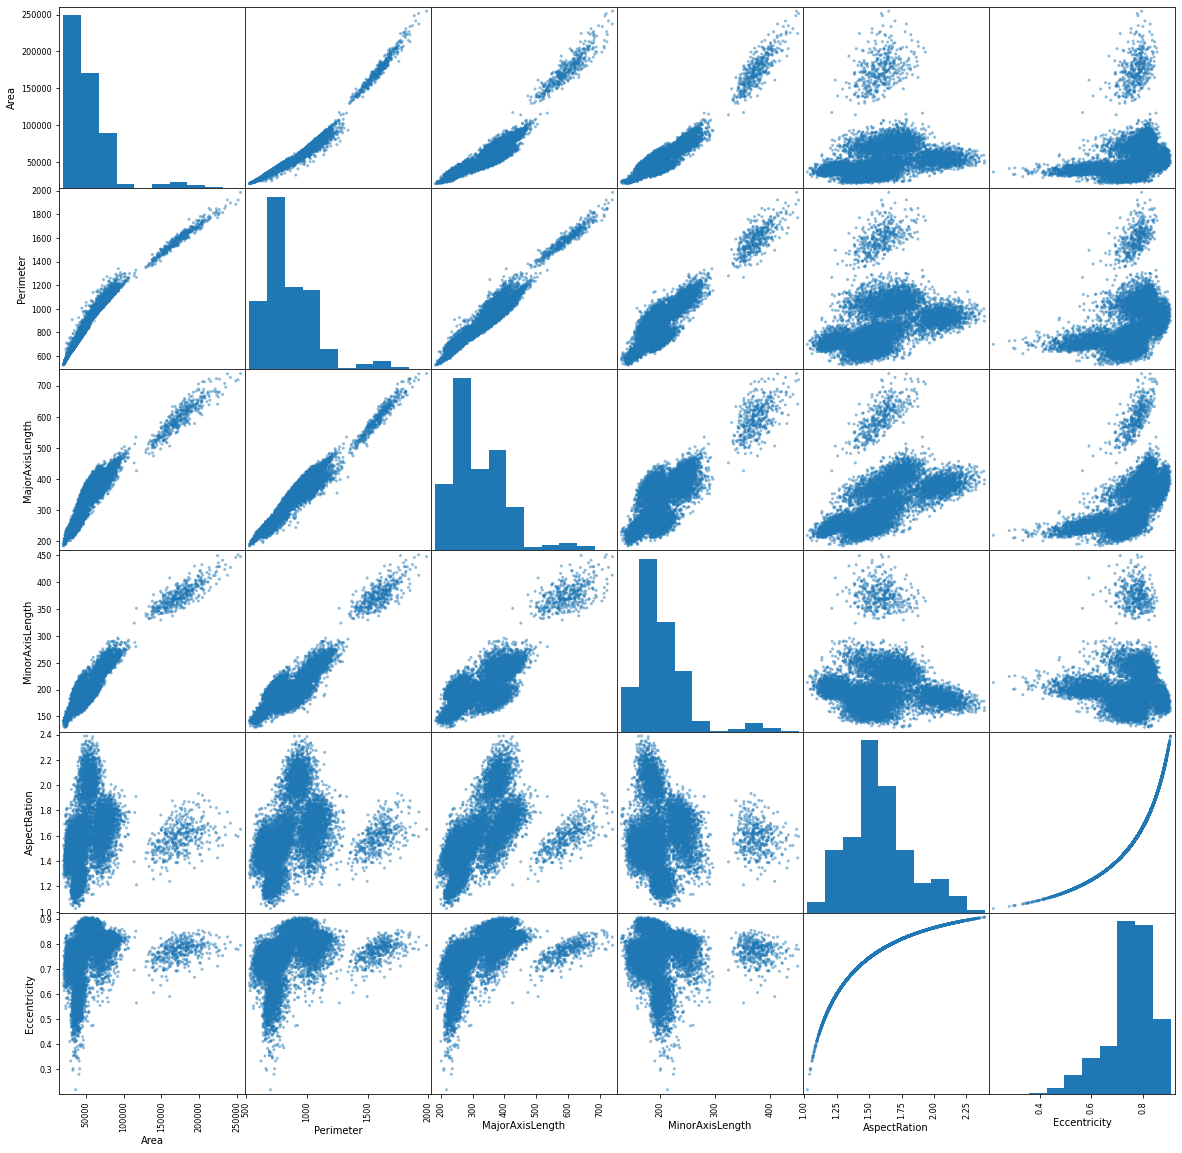

In [15]:
sm = pd.plotting.scatter_matrix(train_df[selected_features], figsize=(20,20))

There are some linear relationship across the variables.
Postive relationship:
1. Area vs Perimeter
2. Area vs Major Axis length
3. Area vs Minor Axis length
4. Perimeter vs Major Axis length
5. Perimeter vs Minor Axis length
6. Major Axis length vs Minor Axis length

Log function(expotential fucntion)
1. Eccentricity vs Aspect Ration

In [16]:
train_df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

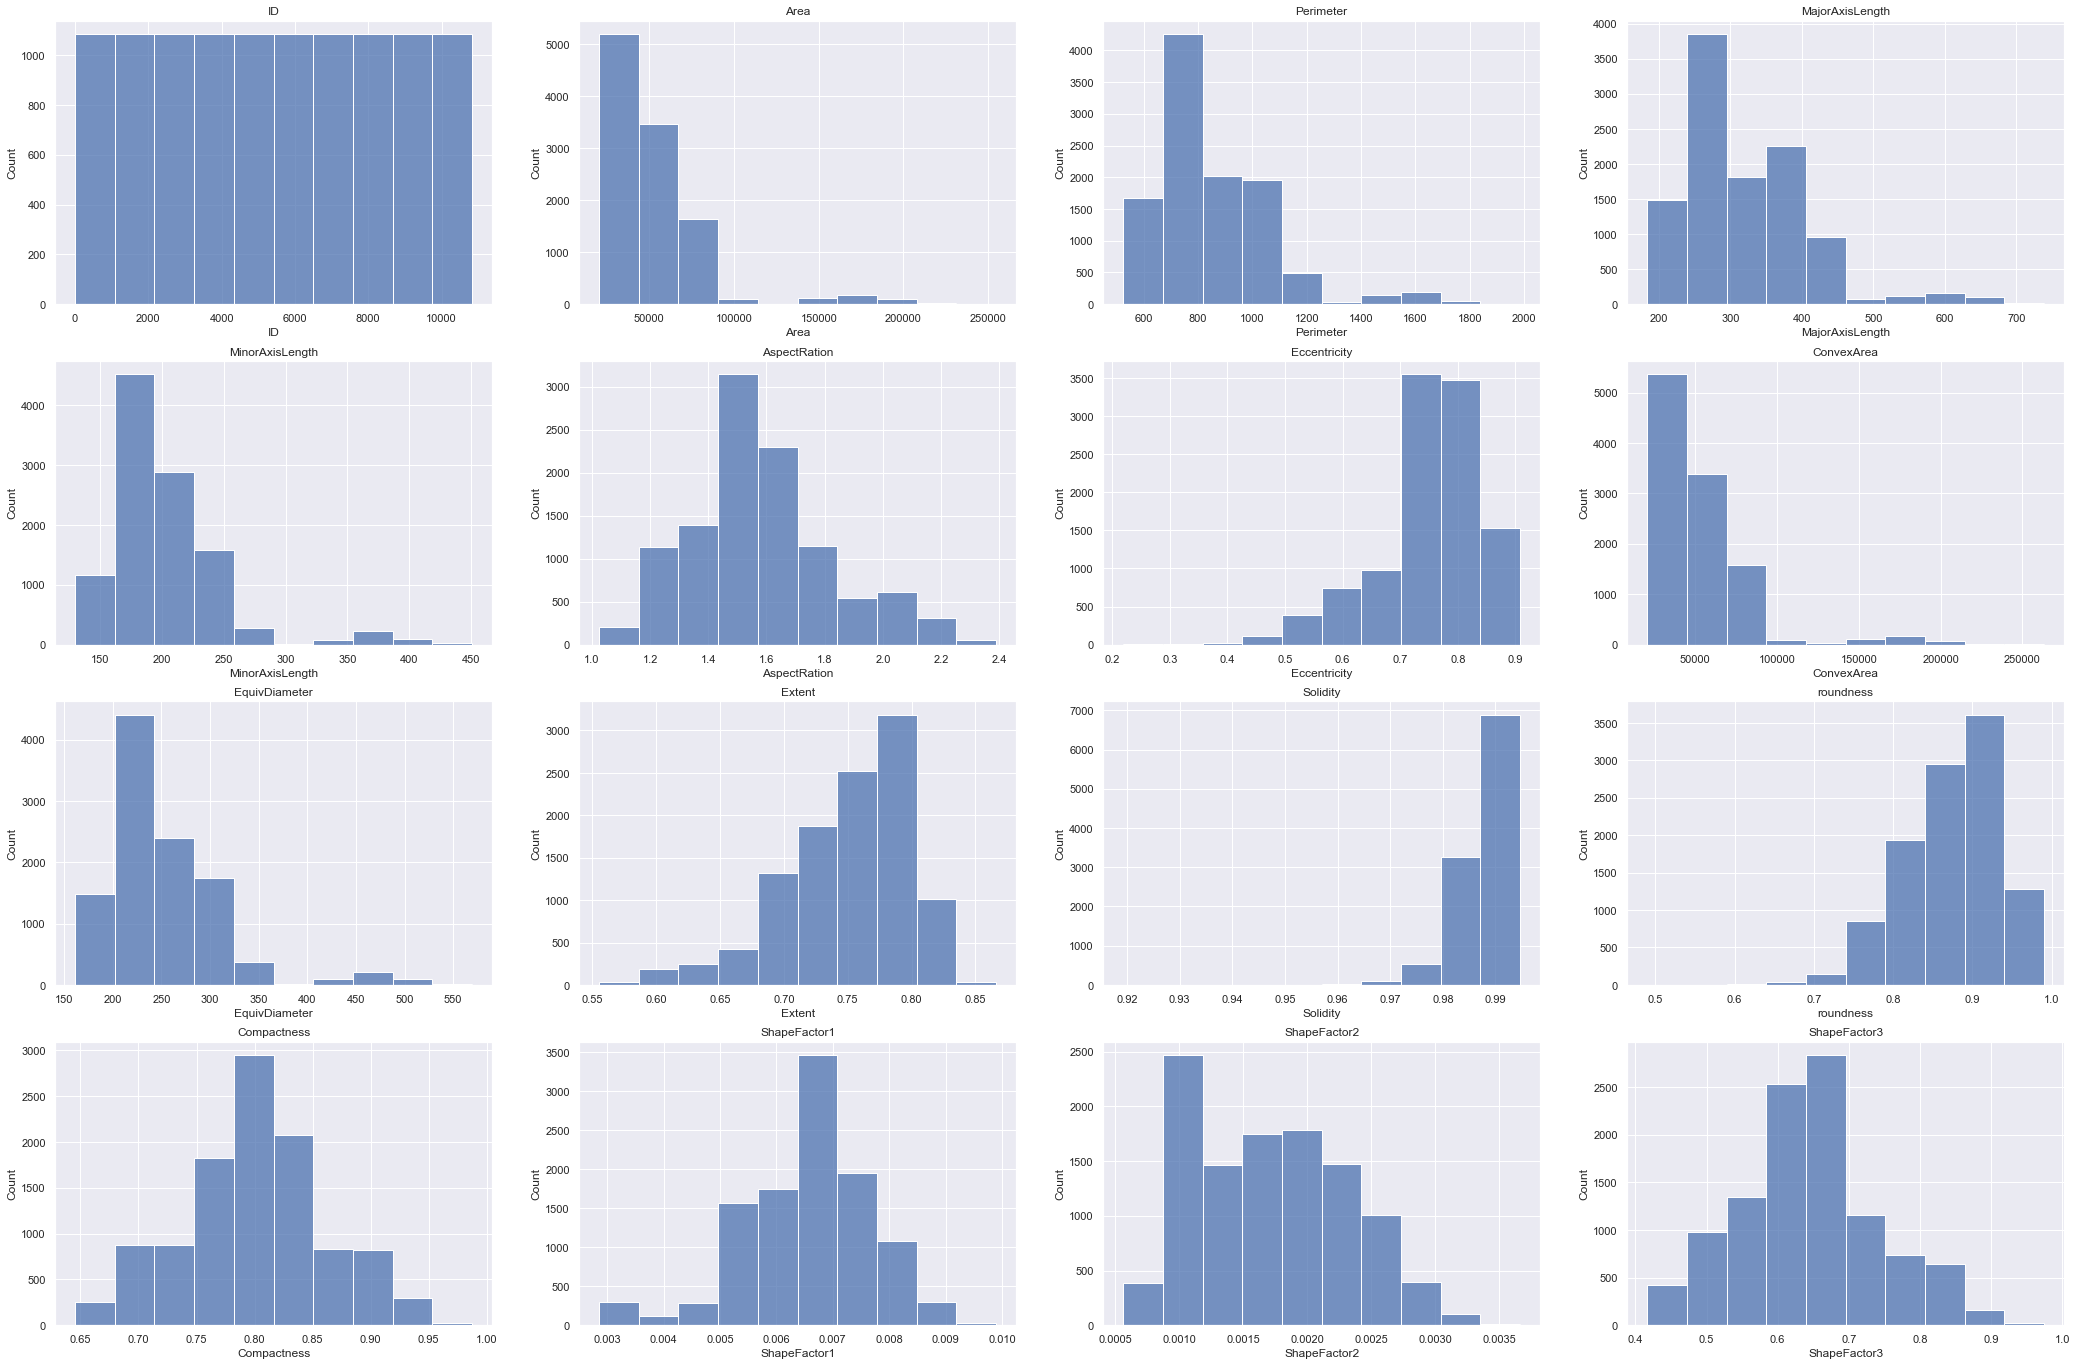

In [17]:
COLUMNS = train_df.columns.tolist()
feature_cols = COLUMNS[:-1]
sns.set(style='darkgrid')
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,24))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(train_df, x=name, bins=10, ax=ax).set(title=name)

In [18]:
feature_columns = [x for x in train_df.columns if x not in ['ID','y']]

skew_columns = (train_df[feature_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.8]
skew_columns

Area               2.970246
ConvexArea         2.960315
MinorAxisLength    2.251468
EquivDiameter      1.971378
Perimeter          1.650773
MajorAxisLength    1.390286
dtype: float64

In [19]:
# from scipy.stats import yeojohnson

# # Apply transformation to long-tailed columns
# yeoj = dict()
# yeoj_fields = ['ShapeFactor4', 'Solidity', 'Eccentricity', 'roundness']
# yeoj_fields = yeoj_fields
# for f in yeoj_fields:
#     yeoj[f] = yeojohnson(train_df[f])
#     train_df[f] = yeoj[f][0]
#     print("{0} transformed with lambda {1}".format(f, yeoj[f][1]))

In [20]:
# from sklearn.preprocessing import StandardScaler

# for col in skew_columns.index.tolist():
#     train_df[col] = np.log1p(train_df[col])

# sc = StandardScaler()
# train_df[feature_columns] = sc.fit_transform(train_df[feature_columns])

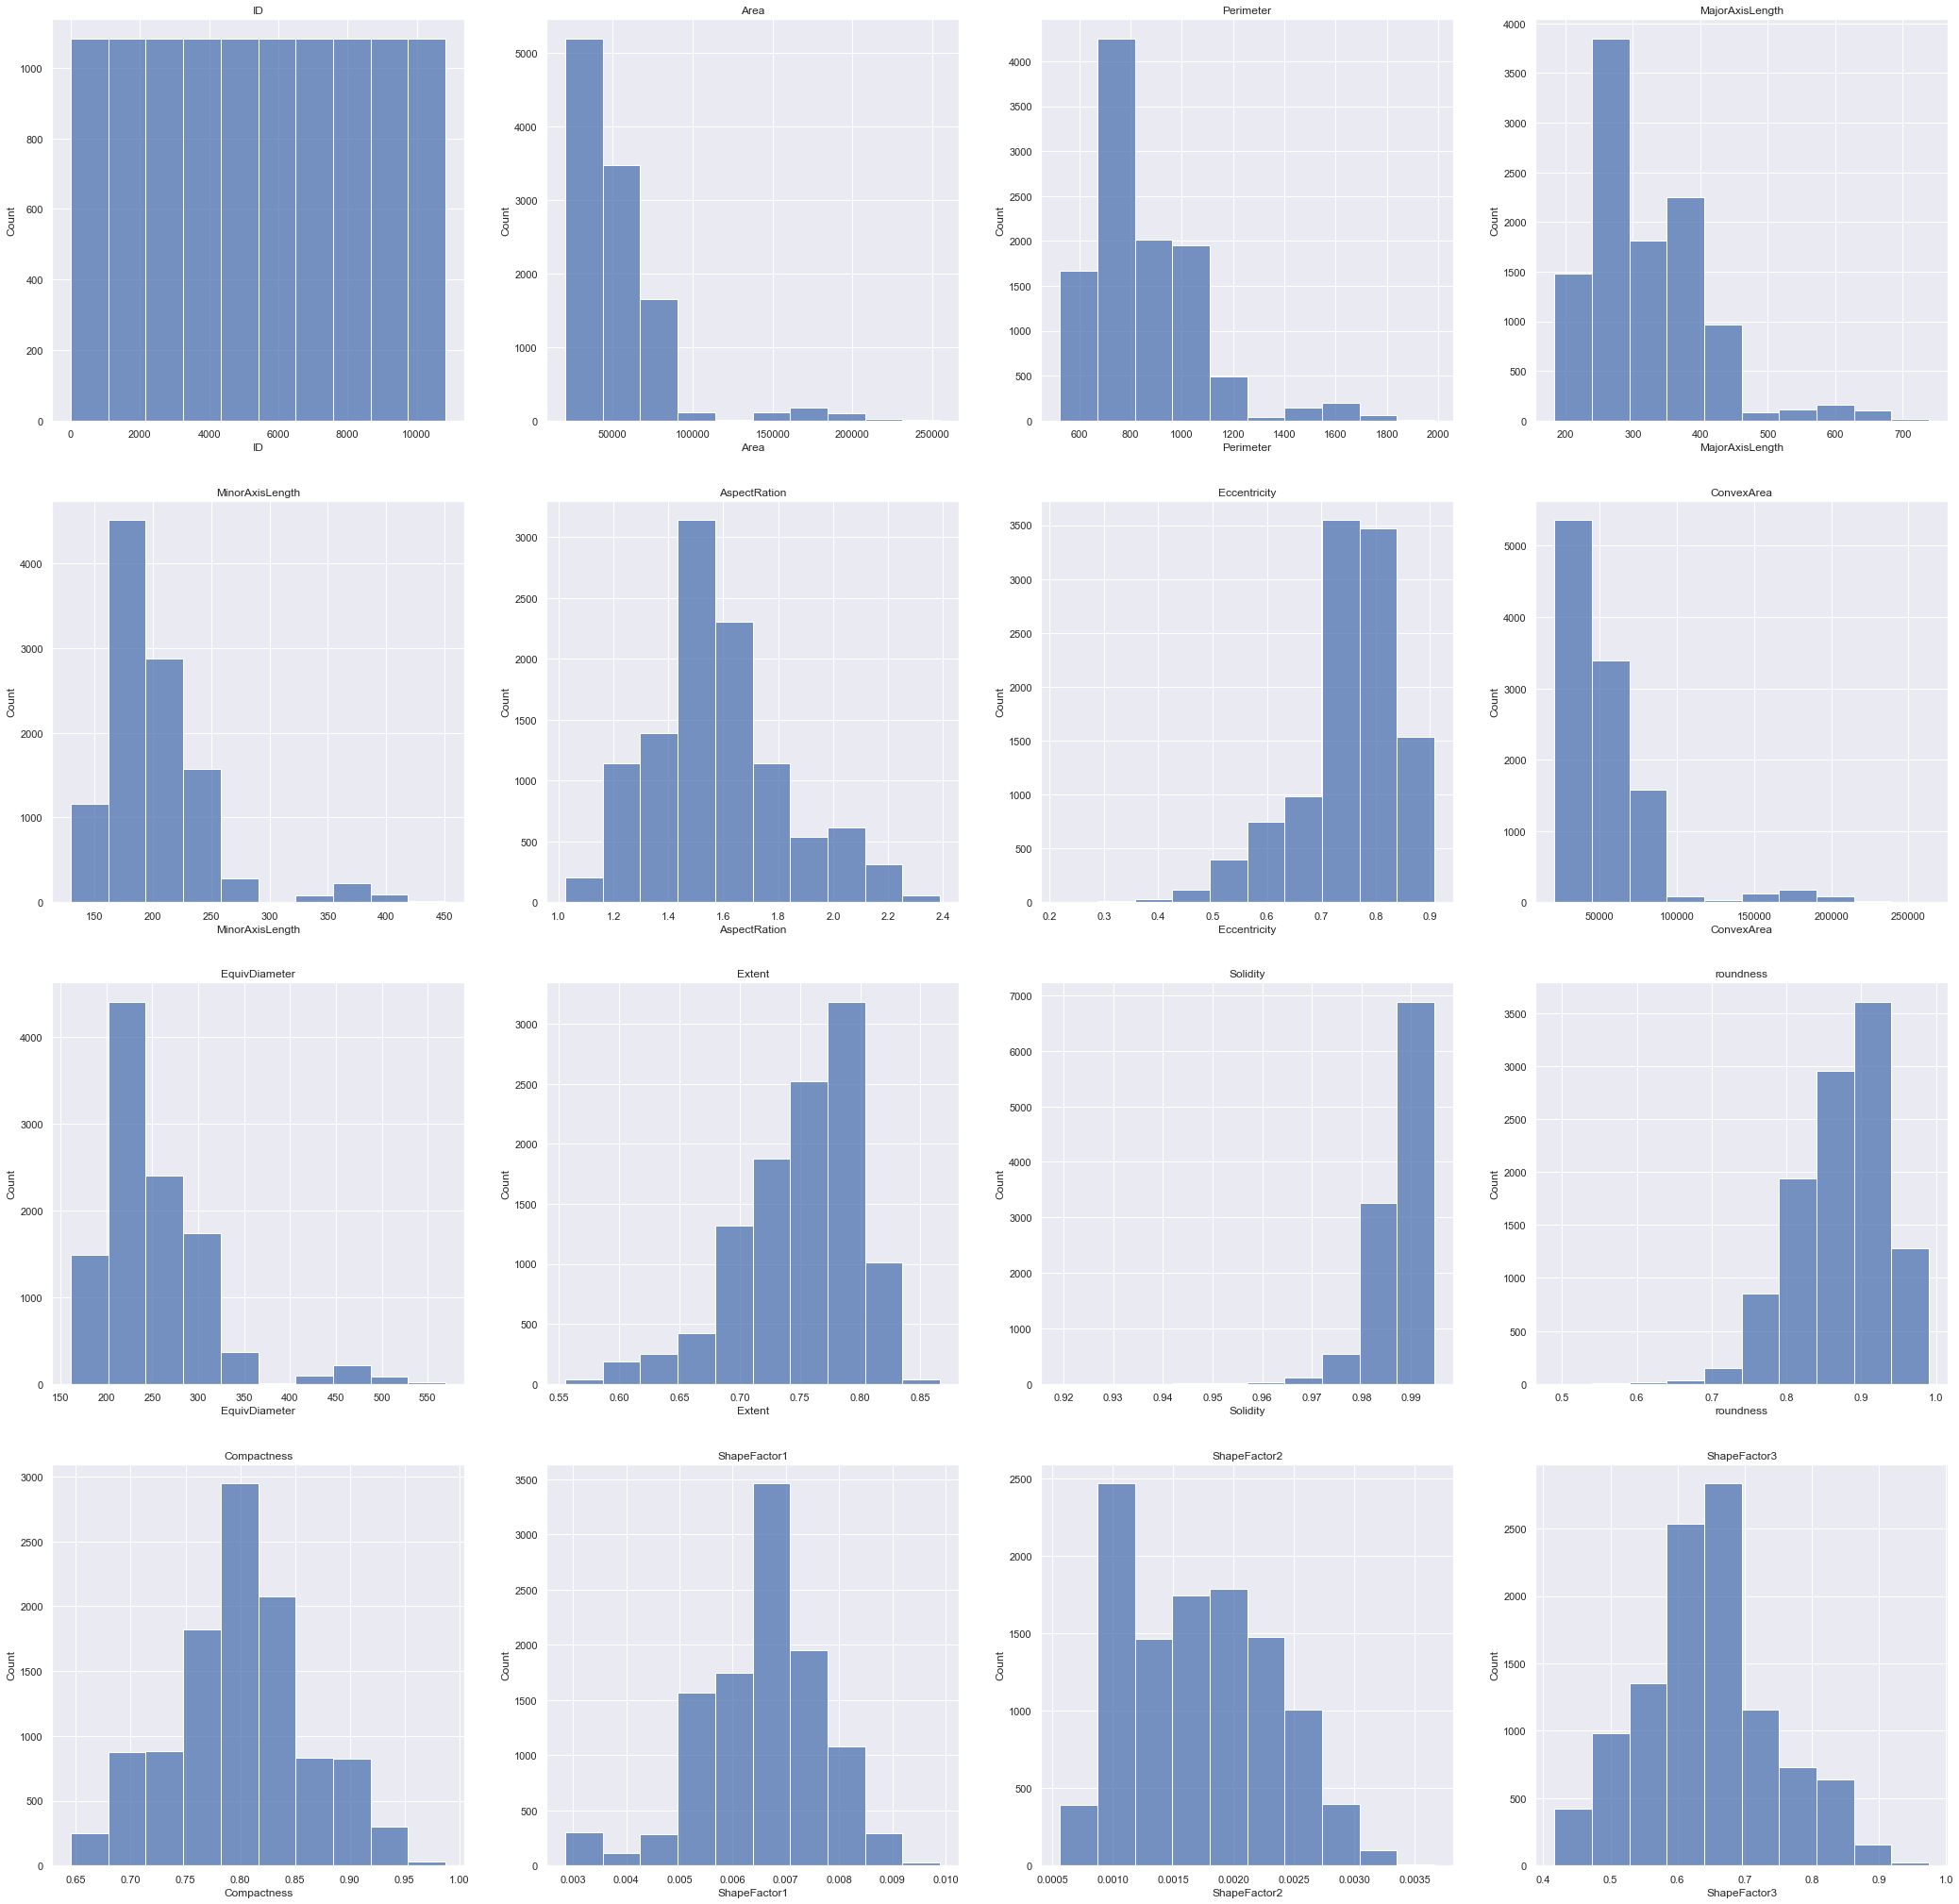

In [21]:
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,36))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(train_df, x=name, bins=10, ax=ax).set(title=name)

In [22]:

train_df['Elongation']=train_df['MinorAxisLength']/train_df['MajorAxisLength'].mean()
train_df['Circularity']=train_df['Area']/train_df['Perimeter']
train_df['Ellipse ratio']=train_df['Area']/train_df['MinorAxisLength']*train_df['MajorAxisLength']
train_df['Circle Ratio']=train_df['Area']/train_df['MajorAxisLength']

test_df['Elongation']=test_df['MinorAxisLength']/test_df['MajorAxisLength'].mean()
test_df['Circularity']=test_df['Area']/test_df['Perimeter']
test_df['Ellipse ratio']=test_df['Area']/test_df['MinorAxisLength']*test_df['MajorAxisLength']
test_df['Circle Ratio']=test_df['Area']/test_df['MajorAxisLength']

In [23]:
test_df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Elongation', 'Circularity',
       'Ellipse ratio', 'Circle Ratio'],
      dtype='object')

In [24]:
# # Detect  outliers in the dataset

# def remove_outliers(df, features):
#     Q1 = np.percentile(df[features], 25)   
#     Q3 = np.percentile(df[features], 75) 
#     IQR = Q3 - Q1 

#     # Above Upper bound
#     upper = df[col] >= (Q3+IQR * 2)

#     # Below Lower bound
#     lower = df[col] <= (Q1-IQR * 2)

#     outliers = df[upper | lower]


# #     print(col , 'before removing outliers \n',df[col].head(20),'\n ################################')

#     # median of non outliers values in specific column
#     median = df.loc[np.logical_not(upper | lower), col].median() 
#     df.loc[(upper | lower), col] = np.nan
#     df[col].fillna(median,inplace=True)
    
# #     print(col , 'after removing outliers \n',df[col].head(20),'\n ################################')

#     return df

# features=['roundness']

# for col in features:
#     train_df = remove_outliers(train_df,col)
#     test_df = remove_outliers(test_df,col)
# print('Number of of samples in the dataset after removing outliers: %d' % len(train_df))

# print('Number of of samples in the dataset after removing outliers: %d' % len(test_df))


In [25]:
# def log_transform_clean(x):
#     if x>0:
#         return np.log(x)_
#     else:
#         return 0

In [26]:
# from sklearn.svm import SVC
# from sklearn.decomposition import PCA
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# from sklearn.model_selection import RepeatedStratifiedKFold
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# #using gridsearch to find the optimum values of hyperparameters
# param_grid_ = {'C': [10], 'gamma': ['auto'], 'kernel': ['rbf']}
# search= GridSearchCV(SVC(decision_function_shape='ovo'),param_grid_,refit=True,verbose=3, cv=cv)
# scaler_=StandardScaler()
# df=train_df.drop(columns=['ID','y'],axis=1)
# Y=train_df['y']
# scaler_.fit(df)

# test=test_df.drop(columns=['ID'],axis=1)
# scaled_X=scaler_.transform(df)
# scaled_test=scaler_.transform(test)
# X_train,X_val,y_train,y_val= train_test_split(scaled_X,Y,test_size=0.2, random_state=42) 

# sm = SMOTE(random_state=12)
# X_sm, Y_sm = sm.fit_resample(X_train, y_train)

# pca_=PCA(n_components=8, random_state=101)
# pca_.fit(X_sm)
# pca_X=pca_.transform(X_sm)
# pca_val=pca_.transform(X_val)
# pca_test=pca_.transform(scaled_test)
# sum(pca_.explained_variance_ratio_*100)

# #Thus >99%  of the variance in the data is still retained even after reducing the components to 10.
# search.fit(pca_X, Y_sm)



In [27]:
# pred_svc=search.predict(pca_val)

In [28]:
# print(search.best_score_)
# from sklearn.metrics import accuracy_score
# #print(round(SVC.score(pca_val,y_val) *100))
# print(np.round(accuracy_score(pred_svc,y_val),decimals=4)*100)

In [29]:
from sklearn.model_selection import train_test_split
df=train_df.drop(columns=['ID',"y"],axis=1)
test=test_df.drop(columns=['ID'],axis=1)
Y=train_df["y"]



#apply Robust scaler
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
rb_df_ = trans.fit(df)
rb_df = rb_df_.transform(df)
rb_test = rb_df_.transform(test)


#convert the array back to a dataframe
scaled_df = pd.DataFrame(rb_df,columns=df.columns)
scaled_df.head()




,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Elongation,Circularity,Ellipse ratio,Circle Ratio
0,0.544777,0.653008,0.822611,-0.134810,2.125342,1.266132,0.541883,0.527444,-2.281944,-0.187074,-1.291886,-1.639088,0.128419,-0.764359,-1.525751,0.522756,-0.134810,0.350216,0.918713,-0.121282
1,-0.005210,-0.132903,-0.251184,0.518081,-1.146089,-1.844348,-0.014420,-0.005407,0.170410,1.320036,1.092843,1.343318,-0.490484,0.669985,1.427720,0.231459,0.518081,0.244014,-0.224276,0.529533
2,-0.520329,-0.514704,-0.460767,-0.582377,-0.467863,-0.559845,-0.513866,-0.585815,0.606030,0.022075,0.568085,0.502230,0.676757,0.587736,0.515092,0.318841,-0.582377,-0.669515,-0.393765,-0.575321
3,-0.235136,-0.219625,-0.227884,-0.204482,-0.341812,-0.390431,-0.232756,-0.252418,0.088051,0.169199,0.251395,0.372117,0.202562,0.301592,0.379505,0.678516,-0.204482,-0.280300,-0.202561,-0.188477
4,-0.084764,-0.067434,-0.123724,0.017199,-0.353592,-0.405610,-0.083071,-0.088966,-0.445350,0.030919,0.065016,0.368808,-0.022484,0.210301,0.376076,0.026261,0.017199,-0.101708,-0.113489,0.021903


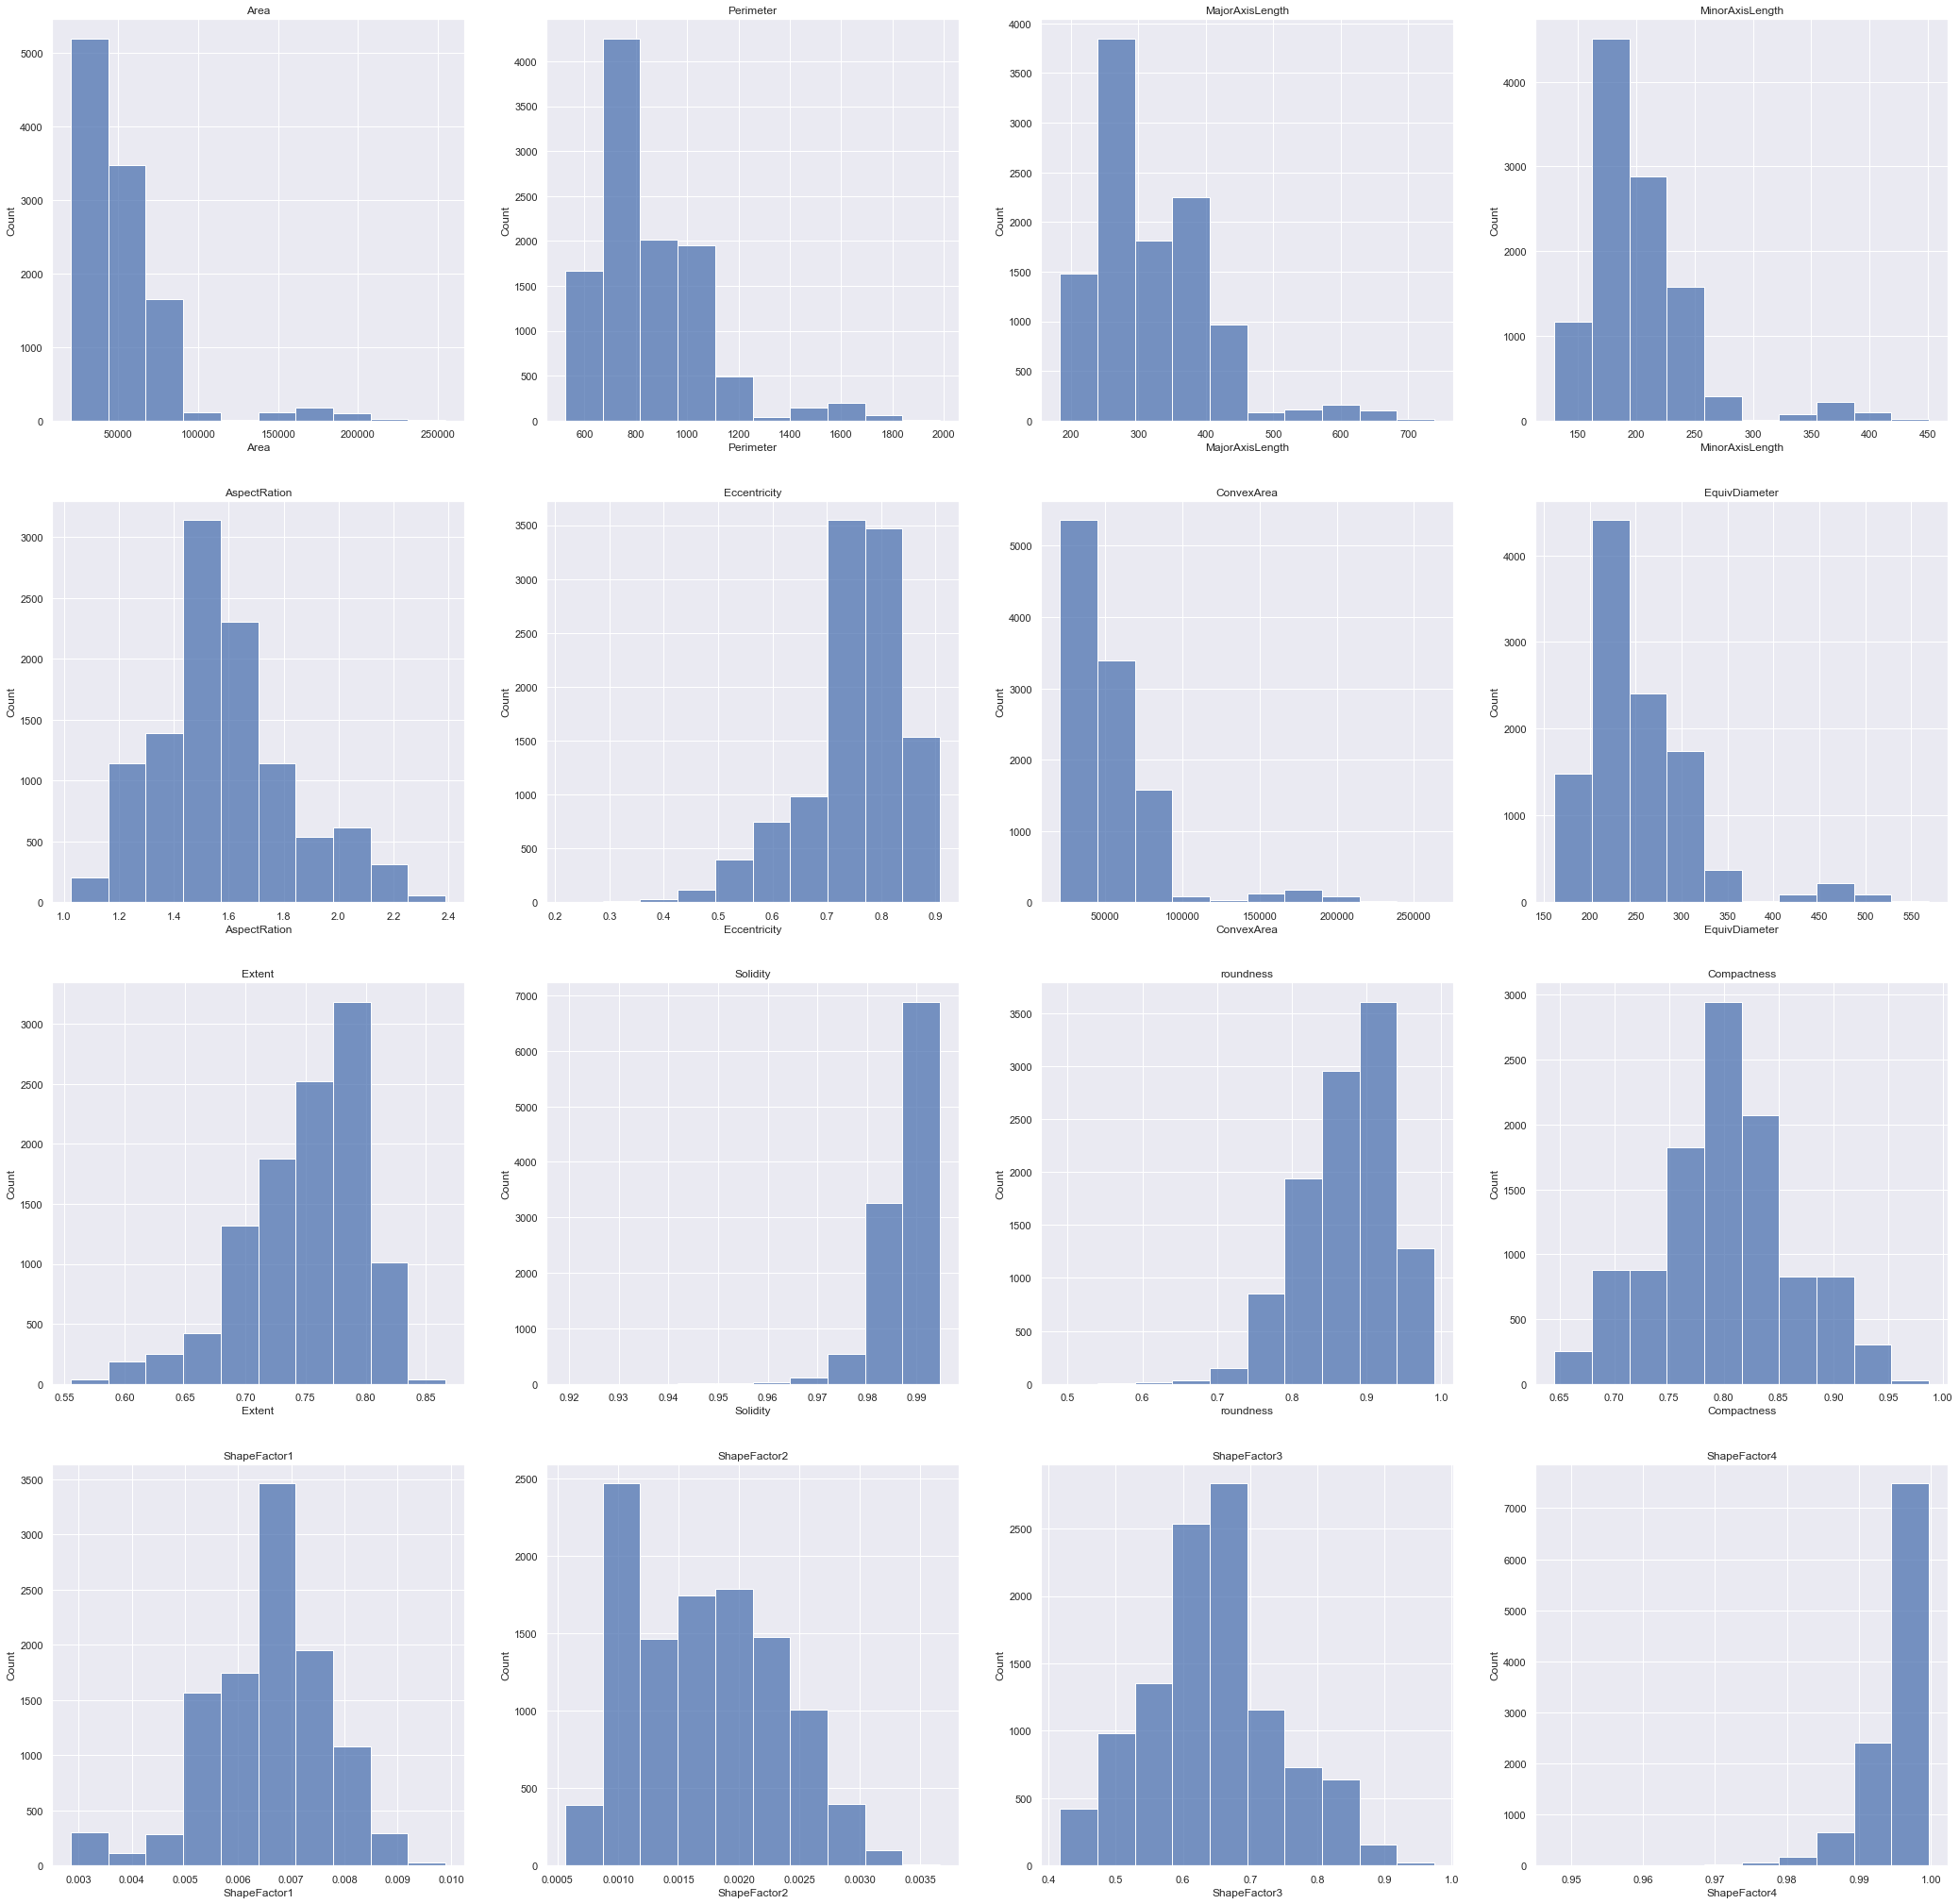

In [30]:
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,36))
ax_list = ax_list.flatten()
for name, ax in zip(df.columns, ax_list):
     g = sns.histplot(df, x=name, bins=10, ax=ax).set(title=name)

In [31]:
X_train,X_val,y_train,y_val= train_test_split(scaled_df,Y,test_size=0.2, random_state=42) 
X_train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Elongation,Circularity,Ellipse ratio,Circle Ratio
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8.667000e+03,8667.000000
mean,0.340171,0.226696,0.195016,0.237197,0.120070,-0.139645,0.341011,0.229700,-0.151072,-0.253776,-0.117200,-0.023712,-0.057650,0.013987,0.009375,-0.316230,0.237197,0.258894,2.863057e-01,0.234518
std,1.186725,0.791333,0.701678,1.095798,0.904964,0.980103,1.177890,0.927694,0.718737,1.056503,0.710661,0.865464,0.818728,0.588267,0.869205,1.022049,1.095798,1.164784,8.594272e-01,1.091520
min,-0.969120,-0.986798,-0.899899,-1.520938,-1.947432,-5.851517,-0.955163,-1.198506,-3.008027,-15.736494,-4.722232,-2.207674,-2.744714,-1.126378,-1.999474,-11.582442,-1.520938,-1.914918,-6.937760e-01,-1.534706
25%,-0.333507,-0.331648,-0.348479,-0.405171,-0.429109,-0.506071,-0.330541,-0.363662,-0.609566,-0.598657,-0.594698,-0.549141,-0.540644,-0.540850,-0.537656,-0.653885,-0.405171,-0.404447,-3.049117e-01,-0.404069
50%,-0.002605,-0.001046,-0.000408,-0.004785,0.003827,0.003886,-0.001254,-0.002702,-0.002925,0.005238,0.001775,-0.003838,0.004861,-0.003143,-0.003850,-0.005947,-0.004785,-0.000770,2.204451e-07,-0.004708
75%,0.661644,0.668259,0.654784,0.594033,0.575824,0.492933,0.663924,0.632255,0.394754,0.397299,0.400492,0.453176,0.456221,0.460370,0.463798,0.355458,0.594033,0.592478,7.008557e-01,0.590537
max,8.287558,4.141453,3.466166,6.243358,3.103611,1.543493,8.317983,5.095604,1.443302,1.455721,1.252308,2.629433,2.358060,1.947744,2.944292,0.793244,6.243358,6.705980,5.577174e+00,6.190929


In [32]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train_labels_enc = le.fit(y_train)
# val_labels_enc = le.fit_transform(y_val)


In [33]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
X_train_s = sd_scaler.fit(X_train)
X_train_sd = X_train_s.transform(X_train)
X_val_sd = X_train_s.transform(X_val)
test_sd =X_train_s.transform(rb_test)
X_train_sd_df = pd.DataFrame(X_train_sd,
                          index=X_train.index,
                          columns= X_train.columns)

In [34]:
X_train_sd_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Elongation,Circularity,Ellipse ratio,Circle Ratio
6874,0.560921,0.826069,0.759028,0.646750,0.331621,0.525941,0.564546,0.751873,0.375740,-0.520551,-0.887474,-0.439227,-0.916354,-0.838647,-0.468675,-0.220973,0.646750,0.651454,0.586859,0.647518
401,0.009667,0.103234,0.269161,-0.080684,0.594729,0.704639,0.002472,0.127855,-1.339572,0.742058,-0.035344,-0.659670,-0.119188,-0.666723,-0.679215,0.404464,-0.080684,0.147600,0.126019,-0.072373
2826,0.180224,0.448794,0.439504,0.149450,0.528375,0.661794,0.183587,0.330021,-0.899365,-0.504072,-1.061309,-0.617469,-0.388929,-0.743137,-0.639196,-0.206351,0.149450,0.189415,0.277133,0.147521
1631,-0.260725,-0.019509,0.420954,-0.873272,2.485301,1.515398,-0.260750,-0.213356,-1.289795,-0.046778,-1.451512,-2.046722,1.138520,-1.199927,-1.918934,0.378983,-0.873272,-0.423216,0.264723,-0.872280
2245,-0.548578,-0.564085,-0.471555,-0.753796,0.328610,0.523753,-0.548257,-0.611617,0.765976,-0.010350,-0.223918,-0.408309,0.902156,-0.048919,-0.438850,0.809758,-0.753796,-0.658210,-0.475446,-0.744826


# Model

In [35]:

#svc

from  sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
sm = SMOTE(random_state=12)
X_sm, Y_sm = sm.fit_resample(X_train_sd, y_train)
pca_sm_xgb = PCA(n_components=15).fit(X_sm)
pca_train=pca_sm_xgb.transform(X_sm)
pca_val=pca_sm_xgb.transform(X_val_sd)
pca_test=pca_sm_xgb.transform(test_sd)

clf = SVC(decision_function_shape='ovo',C=1.0,kernel='rbf',gamma='auto',probability=True)
clf.fit(pca_train,Y_sm)
print(clf.score(pca_val,y_val) *100)

94.00092293493309


In [36]:
from sklearn.neural_network import MLPClassifier
from  sklearn.multiclass import OneVsOneClassifier


# Create an instance of the classifier
classifier = MLPClassifier(hidden_layer_sizes=(15,15),solver='adam',alpha=10e-2, tol=1e-5,max_iter=1000,random_state=42)

# Train the classifier
classifier = classifier.fit(pca_train,Y_sm)

print(classifier.score(pca_val,y_val) *100)

94.13936317489618


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from  sklearn.multiclass import OneVsRestClassifier

rf_model = OneVsRestClassifier(RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=1, min_samples_split=7, n_estimators=248,random_state=42))
rf_model.fit(pca_train,Y_sm)

print(rf_model.score(pca_val,y_val) *100)

93.67789570835257


In [38]:
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42,min_child_weight= 3, max_depth=6, learning_rate=0.15,gamma=0.2, colsample_bytree= 0.7)
#multi_class = “one_vs_rest”
xgb = xgb_model.fit(pca_train,Y_sm)
print(xgb.score(pca_val,y_val) *100)

93.58560221504383


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(class_weight='balanced', max_features='auto',n_estimators=50, random_state=42)
grid_result = ex_tree_clf.fit(pca_train,Y_sm)
print(grid_result.score(pca_val,y_val) *100)

93.44716197508076


In [40]:
from sklearn.neighbors import KNeighborsClassifier
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
model = KNeighborsClassifier(n_neighbors=10,weights='distance',metric='euclidean')

model.fit(pca_train,Y_sm)
print(model.score(pca_val,y_val) *100)


92.47808029533918


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)
grid_result = lr.fit(pca_train,Y_sm)
print(grid_result.score(pca_val,y_val) *100)

92.47808029533918


In [42]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('svc', clf),('mlp', classifier)],voting='soft')
eclf.fit(pca_train,Y_sm)
#print(eclf.score(pca_val,y_val) *100)

VotingClassifier(estimators=[('svc',
                              SVC(decision_function_shape='ovo', gamma='auto',
                                  probability=True)),
                             ('mlp',
                              MLPClassifier(alpha=0.1,
                                            hidden_layer_sizes=(15, 15),
                                            max_iter=1000, random_state=42,
                                            tol=1e-05))],
                 voting='soft')

In [43]:

pred_svc=eclf.predict(pca_val)
Y_pred=eclf.predict(pca_test)
test_df['y']=Y_pred


In [44]:
from sklearn.metrics import f1_score
print('f1 score for SVC')
round(f1_score(y_val,eclf.predict(pca_val),average='weighted'),5)

f1 score for SVC


0.94187

In [45]:
#accuracy
from sklearn.metrics import accuracy_score
print(np.round(eclf.score(pca_val,y_val) *100),4)
print(np.round(accuracy_score(pred_svc,y_val),decimals=4)*100)


94.0 4
94.19


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_svc))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.97      0.95       232
      BOMBAY       1.00      1.00      1.00        79
        CALI       0.97      0.91      0.94       254
    DERMASON       0.94      0.92      0.93       555
       HOROZ       0.97      0.96      0.96       288
       SEKER       0.96      0.98      0.97       336
        SIRA       0.89      0.92      0.90       423

    accuracy                           0.94      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.94      0.94      0.94      2167



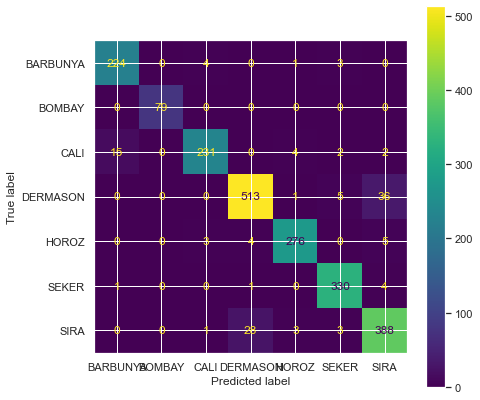

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plt.rcParams["figure.figsize"] = (7,7)
plot_confusion_matrix(eclf,pca_val,y_val)

In [48]:
pd.DataFrame(pca_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.038613,6.641089,7.413366,-0.260400,3.687412,-0.325308,-0.096430,-0.283401,0.270886,0.011150,-0.048096,0.002341,0.008406,0.021492,-0.007294
1,-5.327007,-0.974727,-0.125120,0.322516,0.158602,0.855619,-0.152676,0.169176,-0.056069,0.070292,-0.001283,0.011600,0.004680,-0.006536,-0.002704
2,-1.208803,-1.190312,2.149731,-0.486832,-1.179141,0.073864,-0.229393,-0.108659,0.050816,-0.048434,-0.036457,0.031666,0.045182,-0.007902,-0.004936
3,-6.166802,-0.797086,-0.370493,-0.562753,0.763674,1.205120,-0.290820,0.140521,-0.021859,0.156279,0.015073,-0.029410,0.002623,-0.004230,-0.004775
4,7.728475,-1.622244,0.110132,0.538883,-0.045085,-0.359994,-0.078833,0.185184,0.197988,0.087446,0.001955,-0.018329,0.006364,-0.010558,-0.001374


In [49]:
test_df[['ID','y']].to_csv('dataset/submission.csv', index=False)